The data is related to direct marketing campaign direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., logistic). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/bank-additional-full-1.csv',sep=';')

In [ ]:
data

age        job  marital            education  default housing loan  \
0      56.0  housemaid  married             basic.4y       no      no   no   
1      57.0   services  married          high.school  unknown      no   no   
2      37.0   services  married          high.school       no     yes   no   
3      40.0     admin.  married             basic.6y       no      no   no   
4      56.0   services  married          high.school       no      no  yes   
...     ...        ...      ...                  ...      ...     ...  ...   
41194  74.0    retired  married  professional.course       no     yes   no   
41195  74.0        NaN  married  professional.course       no     yes   no   
41196  74.0    retired  married                  NaN       no     yes   no   
41197   NaN        NaN      NaN                  NaN      NaN     NaN  NaN   
41198  74.0    retired  married  professional.course       no     yes  NaN   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...       1.0  999.0       0.0   
1      telephone   may         mon  ...       1.0  999.0       0.0   
2      telephone   may         mon  ...       1.0  999.0       0.0   
3      telephone   may         mon  ...       1.0  999.0       0.0   
4      telephone   may         mon  ...       1.0  999.0       0.0   
...          ...   ...         ...  ...       ...    ...       ...   
41194   cellular   nov         fri  ...       3.0  999.0       1.0   
41195   cellular   nov         fri  ...       3.0  999.0       1.0   
41196   cellular   nov         fri  ...       3.0  999.0       1.0   
41197        NaN   NaN         NaN  ...       NaN    NaN       NaN   
41198   cellular   nov         fri  ...       3.0  999.0       1.0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41194      failure         -1.1          94.767          -50.8      1.028   
41195      failure         -1.1          94.767          -50.8      1.028   
41196      failure         -1.1          94.767          -50.8      1.028   
41197          NaN          NaN             NaN            NaN        NaN   
41198      failure         -1.1             NaN          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41194       4963.6   no  
41195       4963.6   no  
41196       4963.6   no  
41197          NaN  NaN  
41198       4963.6   no  

[41199 rows x 21 columns]

bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [ ]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41195.000000  41196.000000  41196.000000  41196.000000  41196.000000   
mean      40.030319    258.281265      2.567676    962.482547      0.173124   
std       10.431818    259.254211      2.769751    186.893451      0.494987   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    180.000000      2.000000    999.000000      0.000000   
75%       47.000000    319.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41196.000000    41195.000000   41196.000000  41196.000000  41196.000000  
mean       0.081656       93.575867     -40.504600      3.620787   5166.996405  
std        1.570894        0.578999       4.629972      1.734655     72.300104  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [ ]:
data.describe(include='object')

job  marital          education default housing   loan   contact  \
count    41194    41194              41194   41195   41196  41195     41195   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24934              12168   32595   21584  33957     26151   

        month day_of_week     poutcome      y  
count   41196       41196        41194  41196  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36556

#### **Summary Statistics** (for Numerical Features):

1. **age**:
   - **Count**: 41,195 entries, indicating that this column has missing values.
   - **Mean**: 40.03 years, suggesting that the average age of individuals in the dataset is around 40 years.
   - **Standard Deviation (std)**: 10.43 years, indicating moderate variability in the age of individuals.
   - **Minimum**: 17 years, showing that the youngest individual is 17 years old.
  
   - **Maximum**: 98 years, with the oldest individual being 98 years old.

2. **duration** (the duration of the last contact in seconds):
   - **Count**: 41,196 entries, confirming no missing values.
   - **Mean**: 258.28 seconds (approximately 4 minutes and 18 seconds), representing the average duration of calls made.
   - **Standard Deviation (std)**: 259.25 seconds, showing considerable variability, indicating that some calls are much longer than the average.
   - **Minimum**: 0 seconds, which could be an issue with calls that didn’t last or possibly represent a data entry error.
  
   - **Maximum**: 4,918 seconds (around 82 minutes), which is an unusually long duration, suggesting potential outliers or extreme cases.

3. **campaign** (number of contacts performed during this campaign):
   - **Count**: 41,196 entries, no missing data.
   - **Mean**: 2.57 contacts, implying an average of approximately 2.5 contacts made per individual during the campaign.
   - **Standard Deviation (std)**: 2.77 contacts, showing a relatively wide spread in the number of contacts made.
   - **Minimum**: 1 contact, which is the fewest contacts made.
  
   - **Maximum**: 56 contacts, suggesting the presence of a few outliers where certain individuals were contacted very frequently.

4. **pdays** (number of days since the last contact):
   - **Count**: 41,196 entries, no missing data.
   - **Mean**: 962.48 days (around 2.6 years), representing the average number of days since the last contact for the individuals in the dataset.
   - **Standard Deviation (std)**: 186.89 days, indicating moderate variation in the number of days since the last contact.
   - **Minimum**: 0 days, implying that some individuals were contacted recently (even on the same day).
  
   - **Maximum**: 999 days, reinforcing that many values might be placeholders for missing or non-relevant data.

5. **previous** (number of contacts before this campaign):
   - **Count**: 41,196 entries, no missing data.
   - **Mean**: 0.17 contacts, indicating that most individuals had few previous interactions before the current campaign.
   - **Standard Deviation (std)**: 0.49, showing that the number of previous contacts varies considerably.
   - **Minimum**: 0 contacts, meaning some individuals had no prior contact.
   
   - **Maximum**: 7 contacts, which seems reasonable given the nature of a marketing campaign, but still may indicate a few individuals with unusually high previous interactions.

---

#### **Economic and Financial Features**:
- **emp.var.rate** (employment variation rate):
   - **Mean**: 0.08, indicating that there is a small average fluctuation in employment rates.
   - **Standard Deviation**: 1.57, showing significant volatility in employment variation.
   - **Min/Max Range**: The range from -3.4 to 1.4 highlights the presence of extreme values in employment variations, which may be indicative of external economic factors.

- **cons.price.idx** (consumer price index):
   - **Mean**: 93.58, which seems to be around an index value representing price stability.
   - **Standard Deviation**: 0.58, showing minimal fluctuation.
   - **Min/Max Range**: The minimum and maximum values (92.20 to 94.77) suggest that the consumer price index in this dataset is quite stable.

- **cons.conf.idx** (consumer confidence index):
   - **Mean**: -40.50, indicating an overall low consumer confidence in the dataset (possibly in a recessionary environment).
   - **Standard Deviation**: 4.63, showing some variability in consumer confidence.
   - **Min/Max Range**: The range from -50.80 to -26.90 shows negative confidence scores, typical of an economic downturn.

- **euribor3m** (3-month Euribor rate):
   - **Mean**: 3.62%, indicating the average short-term interest rate.
   - **Standard Deviation**: 1.73%, showing some variability in interest rates.
   - **Min/Max Range**: The range from 0.63% to 5.04% suggests some fluctuation in the Euribor rate during the time frame of the data collection.

- **nr.employed** (number of employees):
   - **Mean**: 5,167, suggesting the average number of employees in the dataset.
   - **Standard Deviation**: 72, indicating slight variation in the number of employees across observations.
   - **Min/Max Range**: The range from 4,963 to 5,228 shows relatively stable employment numbers, with a slight variation in the workforce.

---

### Key Insights:
1. **Data Distribution**: The dataset contains both continuous and categorical features with considerable variability, especially in columns like `duration`, `campaign`, and `previous`.
2. **Outliers**: Some features, such as `duration` (with a maximum of 4918 seconds) and `campaign` (with a maximum of 56 contacts), exhibit potential outliers that may need further exploration.
3. **Economic Context**: Financial and economic features (`emp.var.rate`, `cons.price.idx`, etc.) suggest a period of economic instability, with negative consumer confidence and significant employment rate variation.

In [ ]:
num_col = data.select_dtypes(include = ['int64','float64']).columns

In [ ]:
num_col

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

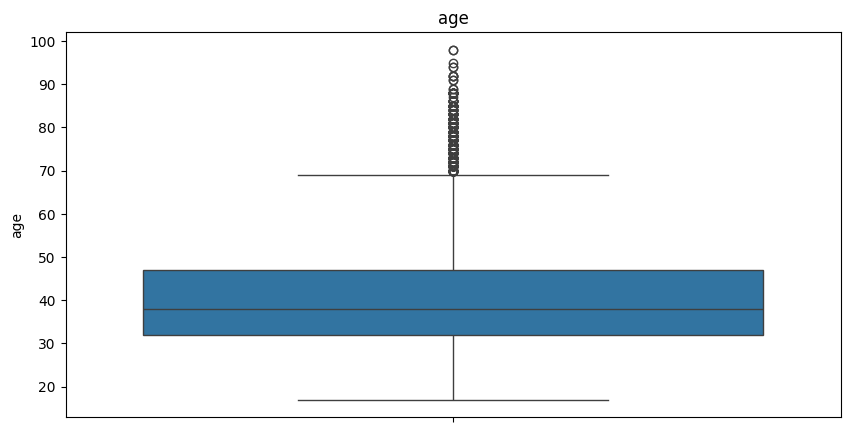

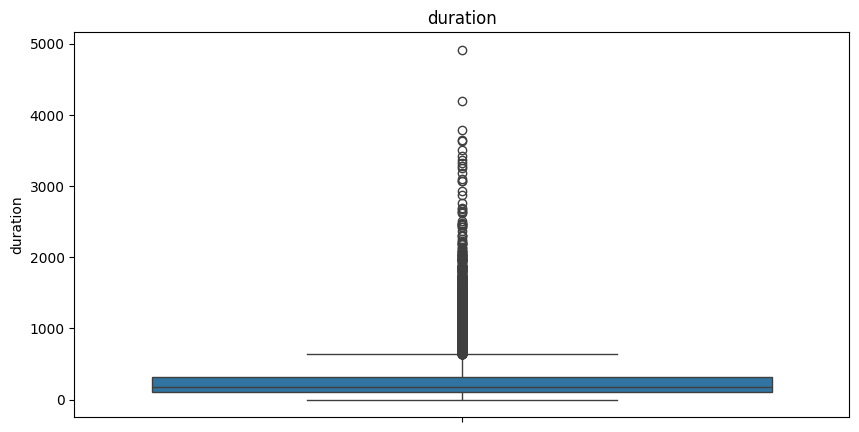

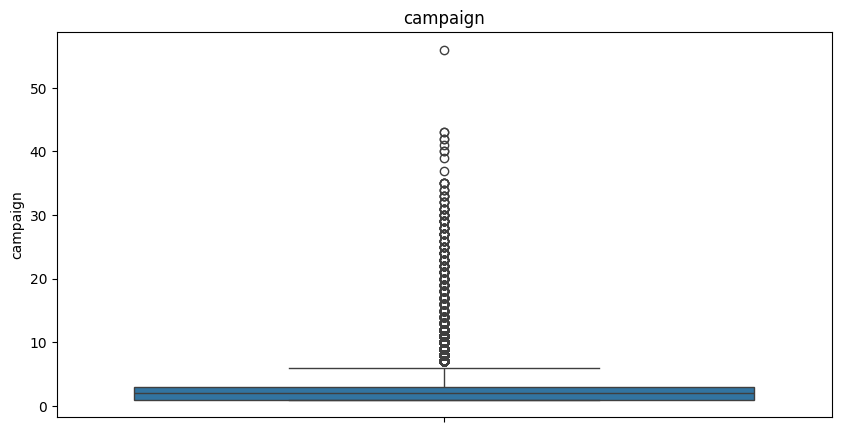

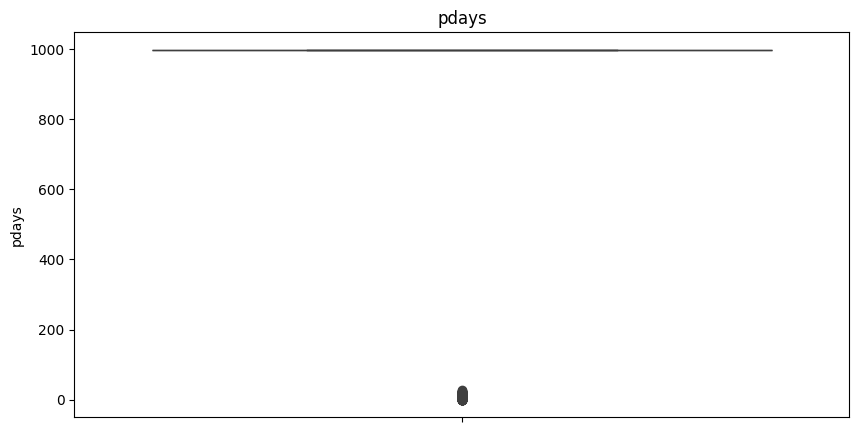

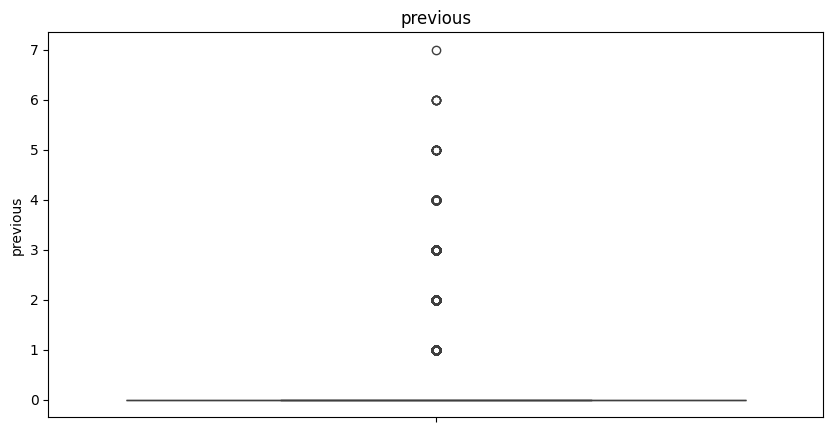

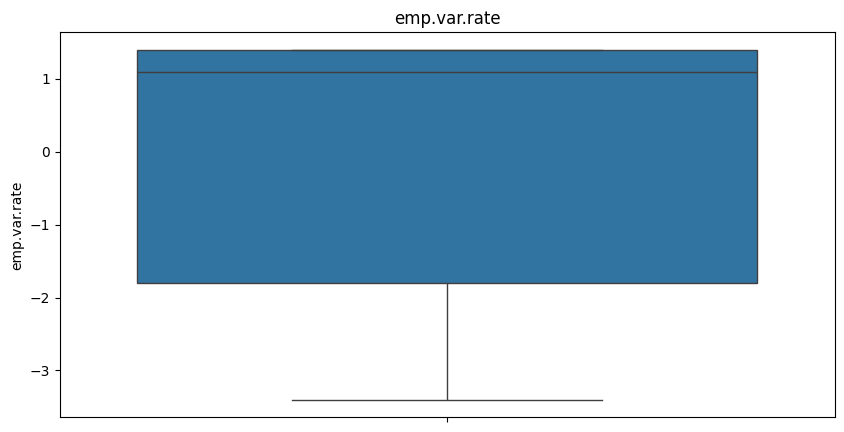

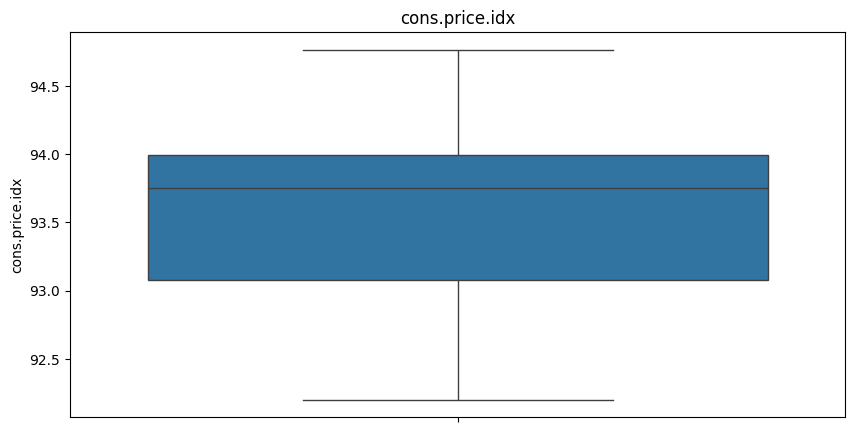

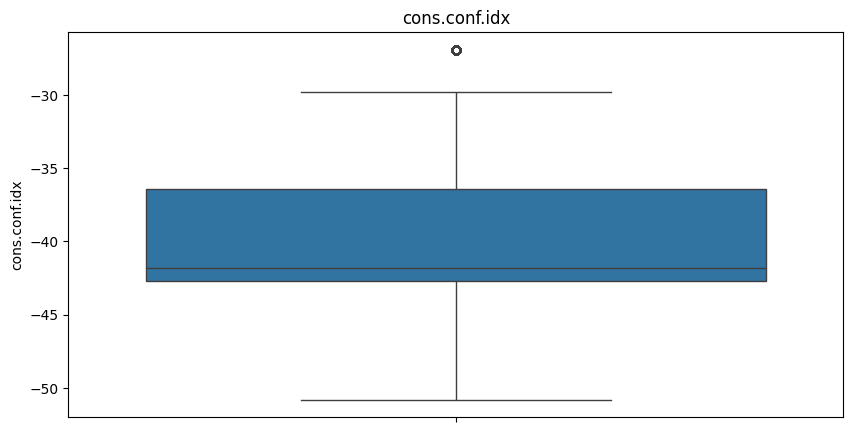

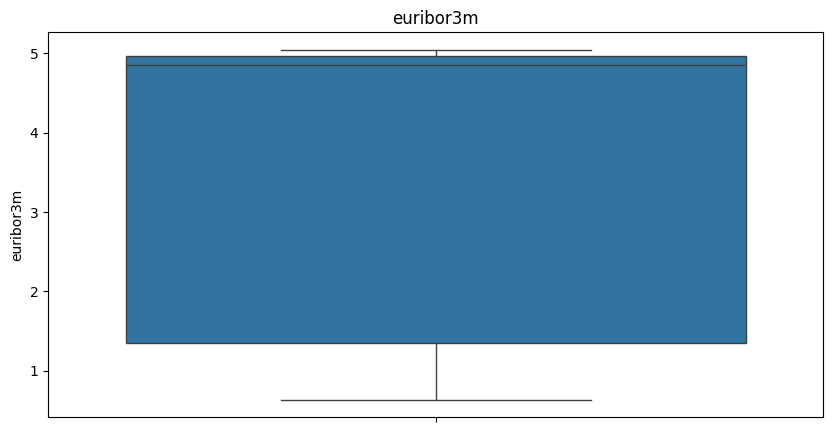

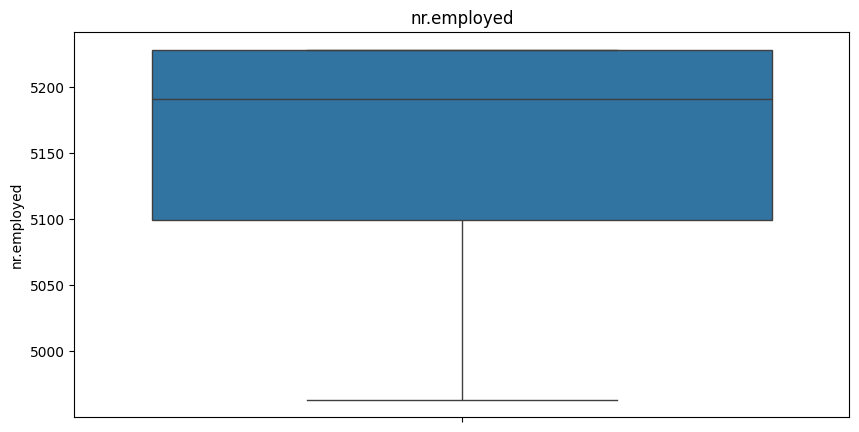

In [ ]:
for col in num_col:
  plt.figure(figsize=(10,5))
  sns.boxplot(y=data[col])
  plt.title(col)
  plt.show()

In [ ]:
# Manage the outliers

Q1 = data['campaign'].quantile(0.25)
Q3 = data['campaign'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['campaign']>=lower_bound) & (data['campaign']<=upper_bound)]



Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['duration']>=lower_bound) & (data['duration']<=upper_bound)]

In [ ]:
data

age        job  marital            education  default housing loan  \
0      56.0  housemaid  married             basic.4y       no      no   no   
1      57.0   services  married          high.school  unknown      no   no   
2      37.0   services  married          high.school       no     yes   no   
3      40.0     admin.  married             basic.6y       no      no   no   
4      56.0   services  married          high.school       no      no  yes   
...     ...        ...      ...                  ...      ...     ...  ...   
41193  94.0    retired  married  professional.course       no     yes   no   
41194  74.0    retired  married  professional.course       no     yes   no   
41195  74.0        NaN  married  professional.course       no     yes   no   
41196  74.0    retired  married                  NaN       no     yes   no   
41198  74.0    retired  married  professional.course       no     yes  NaN   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...       1.0  999.0       0.0   
1      telephone   may         mon  ...       1.0  999.0       0.0   
2      telephone   may         mon  ...       1.0  999.0       0.0   
3      telephone   may         mon  ...       1.0  999.0       0.0   
4      telephone   may         mon  ...       1.0  999.0       0.0   
...          ...   ...         ...  ...       ...    ...       ...   
41193   cellular   nov         fri  ...       3.0  999.0       1.0   
41194   cellular   nov         fri  ...       3.0  999.0       1.0   
41195   cellular   nov         fri  ...       3.0  999.0       1.0   
41196   cellular   nov         fri  ...       3.0  999.0       1.0   
41198   cellular   nov         fri  ...       3.0  999.0       1.0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41193      failure         -1.1          94.767          -50.8      1.028   
41194      failure         -1.1          94.767          -50.8      1.028   
41195      failure         -1.1          94.767          -50.8      1.028   
41196      failure         -1.1          94.767          -50.8      1.028   
41198      failure         -1.1             NaN          -50.8      1.028   

       nr.employed   y  
0           5191.0  no  
1           5191.0  no  
2           5191.0  no  
3           5191.0  no  
4           5191.0  no  
...            ...  ..  
41193       4963.6  no  
41194       4963.6  no  
41195       4963.6  no  
41196       4963.6  no  
41198       4963.6  no  

[35997 rows x 21 columns]

In [ ]:
for col in num_col:
 fig = px.box(data,y=col)
 fig.update_layout(title=col)
 fig.show()

In [ ]:
data.isnull().sum()

age               1
job               2
marital           2
education         2
default           1
housing           0
loan              1
contact           1
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          2
emp.var.rate      0
cons.price.idx    1
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
q1 = data['euribor3m'].quantile(0.25)
q3 = data['euribor3m'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data['euribor3m'] >= lower_bound) & (data['euribor3m'] <= upper_bound)]


Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.age >= Q1 - 1.5*IQR) & (data.age <= Q3 + 1.5*IQR)]



Q1 = data['cons.conf.idx'].quantile(0.25)
Q3 = data['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['cons.conf.idx'] >= Q1 - 1.5*IQR) & (data['cons.conf.idx'] <= Q3 + 1.5*IQR)]

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
data['y'].value_counts()

y
no     32460
yes     2742
Name: count, dtype: int64

In [ ]:
fig = px.bar(data,x='marital',color='y',color_discrete_map={'yes':'green','no':'red'},title='Loan according to Marital Status',barmode='group')
fig.show()

In [ ]:
fig = px.bar(data,x='education',color='y',color_discrete_map={'yes':'green','no':'red'},title='Loan according to Education',barmode='group')
fig.show()

In [ ]:
fig = px.bar(data,x='job',color='y',color_discrete_map={'yes':'green','no':'red'},title='Loan according to Job',barmode='group')
fig.show()

In [ ]:
data['y'].value_counts()

y
no     32460
yes     2742
Name: count, dtype: int64

In [ ]:
data['y']=np.where(data['y']=='yes',1,0)

In [ ]:
data['y'].value_counts()

y
0    32460
1     2742
Name: count, dtype: int64

### VIF (Variance inflaction fector)

In [ ]:
col_list=[]
for col in data.columns:
  if ((data[col].dtypes== 'object') & (col!='y')):
    col_list.append(col)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in col_list:
  data[col]=le.fit_transform(data[col])

In [ ]:
print('classes:',le.classes_)

classes: ['failure' 'nonexistent' 'success']


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
col_lists =[]
for col in data.columns:
  if ((data[col].dtype!='object') & (col!='y')):
    col_lists.append(col)

X=data[col_lists]
vif=pd.DataFrame()
vif['variables']=X.columns
vif['VIF Score']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

variables     VIF Score
0              age     22.115021
1              job      2.101621
2          marital      5.691392
3        education      4.560387
4          default      1.411733
5          housing      2.212167
6             loan      1.208148
7          contact      2.942511
8            month      6.679922
9      day_of_week      3.100839
10        duration      3.223118
11        campaign      3.614582
12           pdays    175.000640
13        previous      6.071252
14        poutcome     34.963220
15    emp.var.rate     37.603588
16  cons.price.idx  37906.926979
17   cons.conf.idx    143.600072
18       euribor3m    322.785280
19     nr.employed  43139.349638

In [ ]:
data = data.drop('nr.employed',axis=1)


In [ ]:
col_lists =[]
for col in data.columns:
  if ((data[col].dtype!='object') & (col!='y')):
    col_lists.append(col)

X=data[col_lists]
vif=pd.DataFrame()
vif['variables']=X.columns
vif['VIF Score']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

variables   VIF Score
0              age   22.108831
1              job    2.101373
2          marital    5.690704
3        education    4.558797
4          default    1.409145
5          housing    2.211854
6             loan    1.208100
7          contact    2.445949
8            month    5.780753
9      day_of_week    3.099974
10        duration    3.213367
11        campaign    3.601415
12           pdays  174.955494
13        previous    5.974460
14        poutcome   34.697608
15    emp.var.rate   22.298625
16  cons.price.idx  729.966319
17   cons.conf.idx  124.925727
18       euribor3m  130.960944

In [ ]:
data = data.drop('cons.price.idx',axis=1)

In [ ]:
col_lists =[]
for col in data.columns:
  if ((data[col].dtype!='object') & (col!='y')):
    col_lists.append(col)

X=data[col_lists]
vif=pd.DataFrame()
vif['variables']=X.columns
vif['VIF Score']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

variables  VIF Score
0             age  20.980060
1             job   2.095801
2         marital   5.545836
3       education   4.503447
4         default   1.409116
5         housing   2.210186
6            loan   1.207528
7         contact   2.348057
8           month   5.722494
9     day_of_week   3.085751
10       duration   3.188934
11       campaign   3.585174
12          pdays  95.539109
13       previous   3.040576
14       poutcome  17.529130
15   emp.var.rate  16.717097
16  cons.conf.idx  82.728157
17      euribor3m  93.862476

In [ ]:
data = data.drop('pdays',axis=1)

In [ ]:
col_lists =[]
for col in data.columns:
  if ((data[col].dtype!='object') & (col!='y')):
    col_lists.append(col)

X=data[col_lists]
vif=pd.DataFrame()
vif['variables']=X.columns
vif['VIF Score']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

variables  VIF Score
0             age  20.156875
1             job   2.092607
2         marital   5.427559
3       education   4.450024
4         default   1.409018
5         housing   2.206477
6            loan   1.207386
7         contact   2.274633
8           month   5.661286
9     day_of_week   3.073686
10       duration   3.177288
11       campaign   3.565812
12       previous   1.497411
13       poutcome   8.136417
14   emp.var.rate  12.918003
15  cons.conf.idx  42.663395
16      euribor3m  63.965627

In [ ]:
data=data.drop('euribor3m',axis=1)

In [ ]:
col_lists =[]
for col in data.columns:
  if ((data[col].dtype!='object') & (col!='y')):
    col_lists.append(col)

X=data[col_lists]
vif=pd.DataFrame()
vif['variables']=X.columns
vif['VIF Score']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

variables  VIF Score
0             age  17.203759
1             job   2.086488
2         marital   5.227727
3       education   4.292492
4         default   1.408626
5         housing   2.198553
6            loan   1.207147
7         contact   2.266537
8           month   5.266830
9     day_of_week   3.033577
10       duration   3.169995
11       campaign   3.559952
12       previous   1.479656
13       poutcome   8.007875
14   emp.var.rate   1.547441
15  cons.conf.idx  32.076548

In [ ]:
data=data.drop('cons.conf.idx',axis=1)

In [ ]:
col_lists =[]
for col in data.columns:
  if ((data[col].dtype!='object') & (col!='y')):
    col_lists.append(col)

X=data[col_lists]
vif=pd.DataFrame()
vif['variables']=X.columns
vif['VIF Score']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

variables  VIF Score
0            age  11.058032
1            job   2.077206
2        marital   4.373197
3      education   4.193571
4        default   1.407640
5        housing   2.162200
6           loan   1.203904
7        contact   2.242555
8          month   4.868637
9    day_of_week   2.970184
10      duration   3.098673
11      campaign   3.393773
12      previous   1.477105
13      poutcome   7.686266
14  emp.var.rate   1.532015

In [ ]:
data=data.drop('poutcome',axis=1)

In [ ]:
col_lists =[]
for col in data.columns:
  if ((data[col].dtype!='object') & (col!='y')):
    col_lists.append(col)

X=data[col_lists]
vif=pd.DataFrame()
vif['variables']=X.columns
vif['VIF Score']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

variables  VIF Score
0            age   9.408917
1            job   2.072446
2        marital   4.138951
3      education   4.118820
4        default   1.407165
5        housing   2.155971
6           loan   1.203516
7        contact   2.231982
8          month   4.855425
9    day_of_week   2.944888
10      duration   3.045958
11      campaign   3.370192
12      previous   1.376282
13  emp.var.rate   1.526783

In [ ]:
data=data.drop('age',axis=1)

In [ ]:
col_lists =[]
for col in data.columns:
  if ((data[col].dtype!='object') & (col!='y')):
    col_lists.append(col)

X=data[col_lists]
vif=pd.DataFrame()
vif['variables']=X.columns
vif['VIF Score']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

variables  VIF Score
0            job   2.035003
1        marital   4.136661
2      education   3.788084
3        default   1.313162
4        housing   2.080200
5           loan   1.198700
6        contact   2.225437
7          month   4.487135
8    day_of_week   2.804486
9       duration   2.829229
10      campaign   3.069025
11      previous   1.371369
12  emp.var.rate   1.522785

In [ ]:
x = data.drop('y',axis=1)
y = data['y']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_train

job  marital  education  default  housing  loan  contact  month  \
40038    0        0          6        0        2     0        0      3   
3658     1        1          0        1        0     0        1      6   
31998    4        2          6        0        2     0        0      6   
9236     1        1          1        0        1     1        1      4   
27997    2        1          5        0        1     1        0      0   
...    ...      ...        ...      ...      ...   ...      ...    ...   
19762    7        1          3        0        0     0        0      1   
7037     9        1          5        0        0     0        1      6   
13001    9        2          5        0        0     0        0      3   
910      1        0          1        1        2     0        1      6   
18508    9        2          5        1        2     0        0      3   

       day_of_week  duration  campaign  previous  emp.var.rate  
40038            1     140.0       1.0       2.0          -1.7  
3658             0     424.0       1.0       0.0           1.1  
31998            2     239.0       2.0       0.0          -1.8  
9236             0      52.0       1.0       0.0           1.4  
27997            4     297.0       1.0       0.0          -1.8  
...            ...       ...       ...       ...           ...  
19762            0     130.0       1.0       0.0           1.4  
7037             2     251.0       1.0       0.0           1.1  
13001            3      52.0       5.0       0.0           1.4  
910              4     107.0       1.0       0.0           1.1  
18508            2      53.0       1.0       0.0           1.4  

[26401 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
prediction = lr.predict(x_test)

In [ ]:
prediction

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import *

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8095
           1       0.56      0.25      0.34       706

    accuracy                           0.92      8801
   macro avg       0.75      0.61      0.65      8801
weighted avg       0.91      0.92      0.91      8801



In [ ]:
accuracy_score(y_test,prediction)

0.9239859106919668

In [ ]:
x_test.shape

(8801, 13)

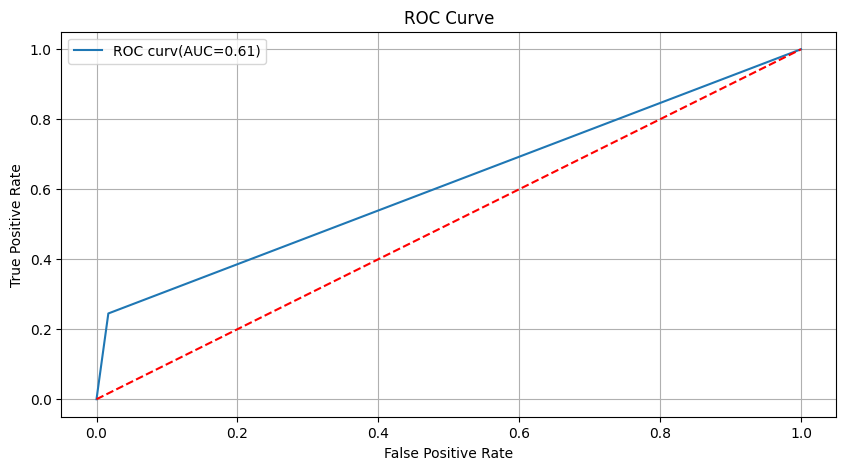

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,threshold=roc_curve(y_test,prediction)
# for roc_score
roc_auc_score(y_test,prediction)

# plot the roc_curv

plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,label=f'ROC curv(AUC={roc_auc_score(y_test,prediction):.2f})')
plt.plot([0,1],[0,1],'r--',)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend(loc='best')
plt.show()